<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.head()


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 8)

### Convert to date time object


In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

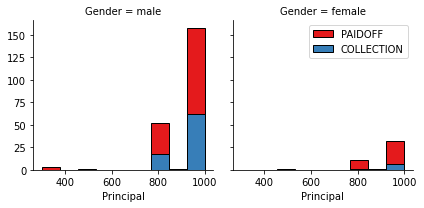

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

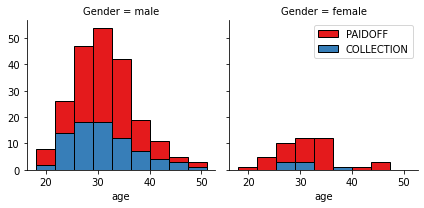

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


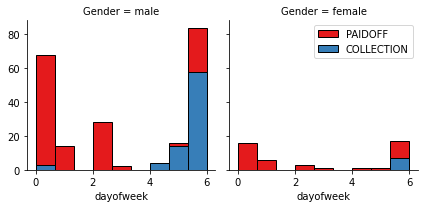

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of females pay their loans while only 73 % of males pay their loan.


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model. 

You should use the following algorithms:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
# DEFINING FEATURES AND PREPROCESSING
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['loan_status']

The best test accuracy is obtained with k = 7 and it is accuracy = 0.7285714285714285.



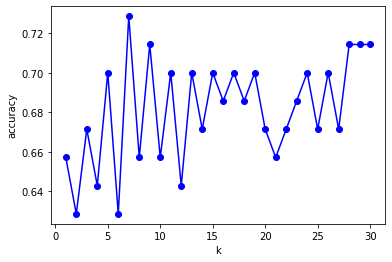

In [21]:
# FINDING THE BEST k
from sklearn import model_selection, neighbors, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)    # train and test set

k_max = 30                
k_list = range(1,k_max+1) # we will perform modeling for different values of k in k_list up to k_max
acc_list = []             # list which we will fill with accuracies for different k

for k in k_list:
    kn = neighbors.KNeighborsClassifier(n_neighbors=k)    # KNN model with k nearest neighbors
    kn.fit(X_train,y_train)                               # fit to train data
    yhat = kn.predict(X_test)                             # predict values using test data
    accuracy = metrics.accuracy_score(y_test,yhat)        # calculate accuracy by comparing prediction with true values
    acc_list.append(accuracy)                             # add to accuracy list

best_acc_knn = max(acc_list)
best_k = k_list[acc_list.index(best_acc_knn)]
print('The best test accuracy is obtained with k = {} and it is accuracy = {}.\n'.format(best_k,best_acc_knn))

# PLOT OF ACCURACY VS. k
plt.plot(k_list,acc_list,'o-b')
plt.xlabel('k')
plt.ylabel('accuracy');

In [22]:
# BUILDING KNN MODEL WITH THE BEST k
kn = neighbors.KNeighborsClassifier(n_neighbors=best_k)    # KNN model using the best k from the above cell
kn.fit(X,y)                                                # we now use the entire dataset to train the model 

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [23]:
# DEFINING FEATURES AND PREPROCESSING
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['loan_status']

In [24]:
# BUILDING A DECISION TREE
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)    # building a decision tree
dt.fit(X,y) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

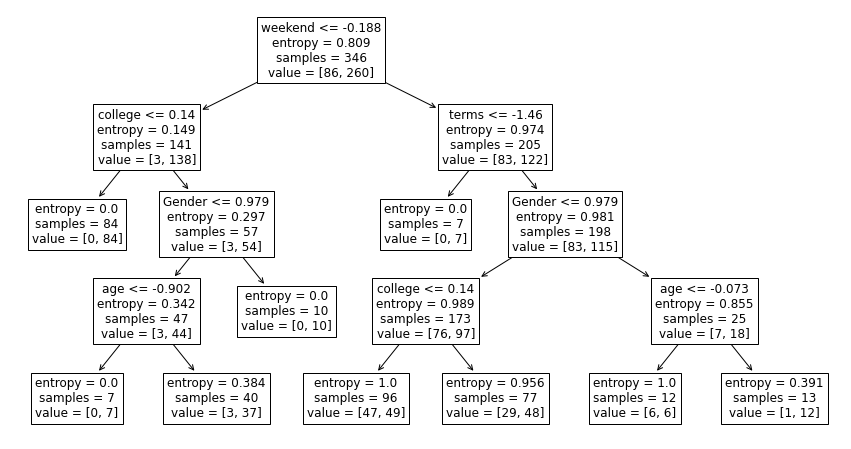

In [25]:
# PLOT DECISION TREE
plt.figure(figsize=[15,8])
tree.plot_tree(dt.fit(X,y),feature_names=Feature.columns.to_list(),fontsize=12);

# Support Vector Machine


In [26]:
# DEFINING FEATURES AND PREPROCESSING
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['loan_status']

In [59]:
# FINDING THE BEST KERNELLING METHOD

from sklearn import model_selection, metrics, svm

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)    # train and test set

kernellist = ['linear','poly','rbf','sigmoid']    # let's test different kernelling methods
j_list=[]                                         # list which we will fill with Jaccard scores for different kernelling methods

for k in kernellist:
    sv = svm.SVC(kernel=k)        # build SVM model
    sv.fit(X_train, y_train)      # predict values using train data
    yhat = sv.predict(X_test)     # calculate accuracy by comparing prediction with true values
    j_score = metrics.jaccard_score(y_test,yhat,pos_label='PAIDOFF')   # Jaccard score that the loan will be paid off
    j_list.append(j_score) 

best_acc_svm = max(j_list)
best_kernel = kernellist[j_list.index(best_acc_svm)]
print('The best Jaccard score for "PAIDOFF" is obtained for kernel method "{}" and it has the value J = {}.'.format(best_kernel,best_acc_svm))


The best Jaccard score for "PAIDOFF" is obtained for kernel method "rbf" and it has the value J = 0.7727272727272727.


In [60]:
# BUILDING SVM MODEL WITH THE BEST KERNELLING METHOD
sv = svm.SVC(kernel=best_kernel)    # SVM model using the best kernel from the above cell
sv.fit(X,y)                         # we now use the entire dataset to train the model 

SVC()

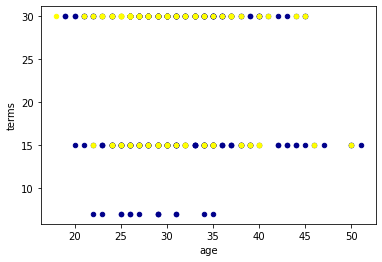

In [61]:
# VISUALIZING PAIDOFF (blue) vs. COLLECTION (yellow) FOR DIFFERENT FEATURES (age,terms)
ax = df[y == 'PAIDOFF'].plot(kind='scatter', x='age', y='terms',color='DarkBlue');
df[y == 'COLLECTION'].plot(kind='scatter', x='age', y='terms',color='Yellow',ax=ax);

# Logistic Regression


In [62]:
# DEFINING FEATURES AND PREPROCESSING
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['loan_status']

In [64]:
# BUILDING LOGISTIC REGRESSION MODEL
from sklearn import linear_model

lr = linear_model.LogisticRegression(C=0.01, solver='liblinear')     # building a logistic regression model
lr.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

# Model Evaluation using Test set


In [65]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [66]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

# CLEAN AND PREPARE THE TEST SET
test_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# PREPARE FEATURE SET
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
X_test = Feature_test
X_test = preprocessing.StandardScaler().fit_transform(X_test)

# LABELS 
y_test = test_df['loan_status']

In [68]:
# LET'S EVALUATE THE ACCURACY OF ALL MODELS BUILT ABOVE
# The accuracy of the model is measured by its ability to correctly predict that the loan will be paid off (pos_label='PAIDOFF')

Jaccard_list = []
F1_score_list = []
LogLoss_list = [np.nan,np.nan,np.nan]

# EVALUATE KNN MODEL:
yhat = kn.predict(X_test)                               
Jaccard_list.append(metrics.jaccard_score(y_test,yhat,pos_label='PAIDOFF'))   
F1_score_list.append(metrics.f1_score(y_test,yhat,pos_label='PAIDOFF'))       

# EVALUATE DECISION TREE MODEL:
yhat = dt.predict(X_test)                                 
Jaccard_list.append(metrics.jaccard_score(y_test,yhat,pos_label='PAIDOFF'))   
F1_score_list.append(metrics.f1_score(y_test,yhat,pos_label='PAIDOFF'))       

# EVALUATE SVM MODEL:
yhat = sv.predict(X_test)                                
Jaccard_list.append(metrics.jaccard_score(y_test,yhat,pos_label='PAIDOFF'))  
F1_score_list.append(metrics.f1_score(y_test,yhat,pos_label='PAIDOFF'))      

# EVALUATE SVM MODEL:
yhat = lr.predict(X_test)                                 
Jaccard_list.append(metrics.jaccard_score(y_test,yhat,pos_label='PAIDOFF')) 
F1_score_list.append(metrics.f1_score(y_test,yhat,pos_label='PAIDOFF'))      
LogLoss_list.append(metrics.log_loss(y_test, lr.predict_proba(X_test)))   

In [69]:
# REPORTING THE ACCURACY OF ALL MODELS IN A NEW DATAFRAME:

report_df=pd.DataFrame(['KNN','Decsion Tree','SVM','Logistic Regression'],columns=['Algorithm'])
report_df['Jaccard'] = Jaccard_list
report_df['F1-score'] = F1_score_list
report_df['LogLoss'] = LogLoss_list

report_df.head()

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.700000,0.823529,NaN
1,Decsion Tree,0.764706,0.866667,NaN
2,SVM,0.722222,0.838710,NaN
3,Logistic Regression,0.740741,0.851064,0.556608


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
